Method to find cubic roots in the style of Omar Khayyam for the equation x^3 + bx = c
Enter your b value: 23
Enter your c value: 45


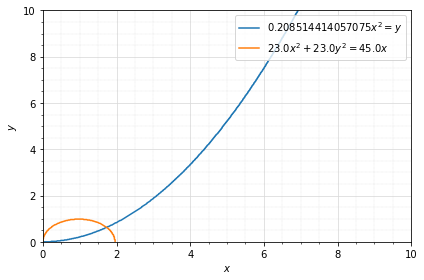

Enter your estimate for the intersection point: 3
1.731009350331986


In [3]:
import math
import sympy as sym
import sys
from sympy import *
from sympy import sympify
from spb import plot_implicit



# Define the function
def f(b, c, x):
    return (x**4)/b + x**2 - (c/b)*x

# Now declare its derivative
def df(b, c, x):
    return 4*(x**3)/b + 2*x - c/b

# plot the two curves with sympy
def plot_solution(b,c):
    # declare x and y as symbolic
    x, y = symbols('x y')
    f = sym.Eq(x**2/math.sqrt(b),y)
    # semicircle equation
    g = sym.Eq(b*x**2 + b*y**2, c*x)
    # plot the three equations where the intersection will be in the centre of the plot
    plot_implicit(f, g, xlim=[0,10], ylim=[0,10])

# function to carry out newton raphson approximation
def newtonRaphson(x0,e,N):
    # Seperate calculation from taking of inputs for readability
    step = 1
    flag = 1
    errorcondition = True
    while errorcondition:
        # set x1 equal to the error of the first guess
        x1 = x0 - f(b, c, x0)/df(b, c, x0)
        # set x1 equal to x0 for the next iteration
        x0 = x1
        # Begin next iteration
        step = step + 1
        
        # Make sure the number of steps does not exceed N (maximum declared by user)
        if step > MaxStep:
            flag = 0
            break
        #check if condition is still true ie. if the current error is still larger than the allowed error
        errorcondition = abs(f(b, c, x1)) > allowederror
        
    # if error condition is met
    if flag==1:
        # print the root found
        print(x1)
    else:
        print('\nNot Convergent in the steps given.')
   
#title of script
print('Method to find cubic roots in the style of Omar Khayyam for the equation x^3 + bx = c')

#initialise variables from user input
b = float(input('Enter your b value: '))
c = float(input('Enter your c value: '))

# plot the two curves
plot_solution(b, c)

# get user to estimate the point of intersection
guess = float(input('Enter your estimate for the intersection point: '))

#initialise components for newton raphson
allowederror = 0.000000001
MaxStep = 50

# print true root from newton raphson using user guess as initial estimate
trueroot = newtonRaphson(guess,allowederror,MaxStep)